# Loading the complete data set ...
## ... and spitting it by country

We are using pandas dataframes here. We load the entire data as a CSV and store a new CSV on the git/data/ folder which only contains a specified country. This new file is then the starting point for other notebooks.

#### ***Note that the complete data set (750MB) is only on my local machine.***

**At the moment, you will not be able to run this script.**

#### Questions to explore:

- How many (and which) countries are in?
- How many responses by country?
- Through time?

In [1]:
import csv
import pandas as pd

datapath = '/Users/seven/data/HiDrive/users/svenbanisch/Projekte/ComputationalSocialScience/infoXpand/DATA/yougov_full/'
gitpath = '../data/'
filename = 'all_countries_numerical'
ext = '.csv'

allcols=['recordno','endtime','qweek','i1_health','i2_health','i7a_health','i3_health','i4_health','i5_health_1','i5_health_2','i5_health_3','i5_health_4','i5_health_5','i5_health_99','i5a_health','i6_health','i7b_health','i8_health','i9_health','i10_health','i11_health','i12_health_1','i12_health_2','i12_health_3','i12_health_4','i12_health_5','i12_health_6','i12_health_7','i12_health_8','i12_health_9','i12_health_10','i12_health_11','i12_health_12','i12_health_13','i12_health_14','i12_health_15','i12_health_16','i12_health_17','i12_health_18','i12_health_19','i12_health_20','i13_health','i14_health_1','i14_health_2','i14_health_3','i14_health_4','i14_health_5','i14_health_6','i14_health_7','i14_health_8','i14_health_9','i14_health_10','i14_health_96','i14_health_98','i14_health_99','i14_health_other','d1_health_1','d1_health_2','d1_health_3','d1_health_4','d1_health_5','d1_health_6','d1_health_7','d1_health_8','d1_health_9','d1_health_10','d1_health_11','d1_health_12','d1_health_13','d1_health_98','d1_health_99','weight','age','gender','state','household_size','employment_status','wcrex2','wcrv_4','core_b2_4','cantril_ladder','phq4_1','phq4_2','phq4_3','phq4_4','m1_1','m1_2','m1_3','m1_4','m2','m3','m4_1','m4_2','m4_3','m4_4','m4_96','m4_99','m4_other','m5_1','m5_2','m6_1','m6_2','m6_3','m6_4','m6_5','m6_6','m6_7','m6_8','m6_96','m6_other','m7_1','m7_2','m7_3','m7_4','m7_5','m7_6','m7_8','m7_9','m7_10','m7_11','m8_1','m8_2','m8_3','m8_4','m8_5','m8_6','m8_7','m8_8','m8_96','m8_99','m8_other','m9_1','m9_2','m9_3','m9_4','m9_5','m9_6','m9_7','m10','m11','m12_1','m12_2','m12_3','m12_4','m12_5','m12_6','m12_7','m12_8','m12_96','m12_99','m12_other','m13_1','m13_2','m13_3','m13_4','m13_5','m13_6','m13_8','m13_9','m13_10','m13_11','v1','v2_1','v2_2','v2_3','v2_4','v2_5','v2_99','v3','v3_open','v4_1','v4_2','v4_3','v4_4','v4_5','v4_96','v4_99','v3_other','wcrex1','i12_health_21','i12_health_22','i12_health_23','i12_health_24','i12_health_25','r1_1','r1_2','r1_3','r1_4','r1_5','r1_6','r1_7','m7_other','m14_1','m14_2','m14_3','m14_4','m14_5','m14_6','m14_7','m14_8','m14_9','m14_10','m14_11','m14_96','m14_99','m14_open','i14_health_11','ct1_1','ct1_2','ct1b_1','ct1b_2','ct1b_3','ct1b_4','ct1b_5','ct1b_6','ct1b_7','ct1b_8','ct1b_9','ct1b_10','ct1b_11','ct1b_96','ct1b_99','ct1b_other','ct2','ct3','ct3_other','ct4','ct5_1','ct5_2','ct5_3','ct5_4','ct5_5','ct5_6','ct5_7','ct5_8','ct5_96','ct5_99','ct5_other','ct6_1','ct6_2','ct6_3','ct6_4','ct6_5','ct6_6','ct6_96','ct6_99','ct6_other','ct7_1','ct7_2','ct7_3','ct8_1','ct8_2','ct8_3','ct8_4','ct8_5','ct8_6','ct8_99','i12_health_26','ox1_1','ox1_2','ox3_1','ox3_2','ox3_3','ox3_4','ox3_5','ox3_6','ox5_1','ox5_2','ox6','ox4_1_1','ox4_2_1','ox4_3_1','ox4_4_1','ox4_5_1','ox4_6_1','ox4_7_1','ox4_8_1','ox4_9_1','ox4_10_1','ox4_11_1','w1','w2','w3','w4_1','w4_2','w4_3','w4_4','w4_5','w4_6','w4_7','w4_8','w4_9','w4_10','w4_11','w4_99','w4b','w5_1','w5_2','w5_3','w5_4','w5_5','w5_6','w5_7','w5_8','w5_9','w5_10','w5_11','w5_12','w5_13','w5_14','w5_15','w5_16','w5_96','w5_99','w6','w7','w9_1','w9_2','w9_3','w9_4','w9_5','disability','work1','work2','work3','work4','work5','work6','work7_1','work7_2','work7_3','work7_4','work7_5','work8','i12_health_27','i12_health_28','i12_health_29','soc1_1','soc1_2','soc1_3','soc2_1','soc2_2','soc2_3','soc2_4','soc2_5','soc2_6','soc2_open','vac_1','vac_2','vac2_1','vac2_2','vac2_3','vac2_4','vac2_5','vac2_6','vac_3','vac3_1','vac3_2','vac3_3','vac3_4','vac3_5','vac3_6','vac3_7','vac3_8','vac3_9','vac3_other','vac4','vac5','vac6','vac7','vac8','av1_1','av1_2','av1_3','av1_99','av2','r1_8','r1_9','r1_10','vac2_7','av3','vac','vac9','vac10_1','vac10_2','vac10_3','vac10_4','vac10_5','vac10_99','vac11','travel1_1','travel1_2','travel1_3','travel1_4','travel1_99','vac12_1','vac12_2','vac12_3','vac12_4','vac12_11','vac12_5','vac12_6','vac12_7','vac12_8','vac12_9','vac12_10','vac12_96','vac12_other','vac13','vac10_8','vac_booster','vac12_12','vac12_13','vac14_1','vac14_2','vac14_3','child_age_1','child_age_2','child_age_3','child_age_4','child_age_5','child_education_1','child_education_2','child_education_3','child_education_4','childvac','combi_vac','household_children','vent_1','vent_2','vent_3','wah_1','wah_2','wah_3','wah4','wah5','wah7_1','wah7_2','wah7_3','wah7_4','wah7_5','wah7_6','wah7_7','wah7_99','wah6','v1_1','v1_2','v1_3','v1_98','v3_me','v3_me_other','v3_baby','v3_baby_other','v3_child2_4','v3_child2_4_other','v3_child5_17','v3_child5_17_other','v3_adult18','v3_adult18_other','v4_8','v4_9','v4_6','v4_98','v4_other','sc_1_1','sc_1_2','sc_1_3','sc_1_4','sc_1_5','sc_1_6','sc_1_7','sc_1_99','sc_2','sc_3_1','sc_3_2','sc_3_3','sc_3_4','sc_3_5','sc_3_6','sc_3_7','sc_3_99','vac_boost_1','vac_boost_2','vac12_booster_1','vac12_booster_2','vac12_booster_3','vac12_booster_4','vac12_booster_5','vac12_booster_6','vac12_booster_7','vac12_booster_8','vac12_booster_9','vac12_booster_10','vac12_booster_96','vac12_booster_other','vac_man_1','vac_man_2','vac_man_3','vac_man_4','vac_man_5','vac_man_6','vac_man_7','vac_man_96','vac_man_99','q_other','household_children_resp','had_covid','vac_boost_beyond','future_1','future_2','had_covid_2','long_covid','future_3','country','case_id','region','employment_status_1','employment_status_2','employment_status_3','employment_status_4','employment_status_5','employment_status_6','employment_status_7','profile_work_stat','i5_health_98','ct5_9','disability_eu','w4_98','w5_98','record','house_rooms','sw_1_1','sw_1_2','sw_1_3','sw_1_4','sw_1_5','sw_1_6','sw_1_7','sw_1_8','sw_1_9','sw_1_10','sw_1_11','sw_1_12','sw_1_13','sw_1_14','sw_1_15','sw_1_98','sw_1_other','sw_2','s1_1','s1_2','s1_3','s1_4','s1_5','s1_6','s1_7','s1_8','s1_9','s1_10','s1_11','s1_12','s1_13','s1_14','s1_17','s1_15','s1_16','inputstate','profile_household_children','city','region_fi','house1','house2','q3_1','q3_2','q3_3','q3_4','i12_health_21_ph','i12_health_22_ph','i12_health_23_ph']
print("Includes", len(allcols),'question items.')


Includes 579 question items.


In [2]:
alldata = pd.read_csv(datapath+filename+ext,usecols=allcols)

/Users/seven/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (56,74,75,76,97,98,109,110,130,131,150,151,169,170,177,178,191,192,193,205,206,207,208,220,222,223,224,225,226,227,228,229,237,238,239,240,246,247,248,249,278,295,296,297,298,304,321,322,323,324,329,346,347,348,349,365,366,367,368,369,370,371,390,391,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,427,428,450,451,452,453,454,455,456,457,458,459,460,463,464,465,471,472,474,482,494,495,496,497,498,499,500,501,502,503,504,505,506,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### ... it is huge and a little bit chaotic ...

In [3]:
print('All in all, there are',alldata.shape[0],'survey responses')

All in all, there are 837368 survey responses


In [10]:
#print(alldata.shape)
#print(alldata.columns)
#print(alldata.dtypes)

### ... let's check how many countries are there.

In [4]:
countries = set(alldata['country'])
print('There are', len(countries), 'countries:')
print(countries)      

There are 32 countries:
{nan, 'netherlands', 'india', 'indonesia', 'australia', 'spain', 'israel', 'france', 'japan', 'philippines', 'vietnam', 'sweden', 'hong-kong', 'italy', 'malaysia', 'united-arab-emirates', 'canada', 'denmark', 'thailand', 'united-kingdom', '1', 'saudi-arabia', 'brazil', 'mexico', 'taiwan', 'united-states', 'china', 'finland', 'norway', 'south-korea', 'singapore', 'germany'}


In [5]:
frequencies = []
for c in countries:
    freq = sum(  alldata['country'] == c  )
    #print(c,': ', freq , 'responses' )
    frequencies.append(freq)

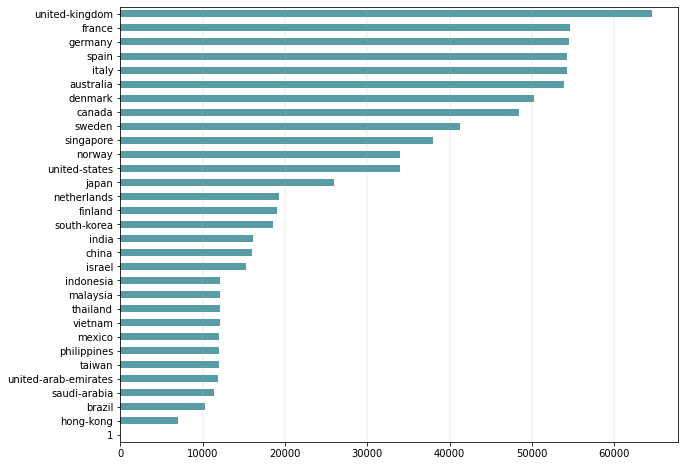

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
alldata['country'].value_counts().plot(kind='barh',color="#599ca5",figsize=(10,8),ax = ax).invert_yaxis()
ax.xaxis.grid(True, linestyle='-', linewidth=0.25 )


## Now we filter for a specific country ...

In [12]:
country = 'united-kingdom'
df_country = alldata[ alldata['country'] == country]
df_country.shape

(64528, 579)

### ... and save the file as an extra CSV now in our repository.

In [13]:
df_country.to_csv(gitpath+filename+'_'+country+ext)

In [14]:
#df_country.head(5)
#df_country.tail(2)